# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset

- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month



### 1. Import required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [3]:
df = pd.read_csv('marketing.csv',encoding='unicode_escape')

In [4]:
df.sample(n=10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
98,4646,1951,2n Cycle,Married,78497.0,0,0,1/12/2013,44,207,...,7,12,2,0,0,0,1,0,0,0
1952,3434,1951,Graduation,Single,80872.0,0,0,12/5/2014,60,483,...,4,10,1,0,0,0,0,0,0,0
1439,3220,1983,Graduation,Married,39922.0,1,0,14-02-2013,30,29,...,0,4,8,0,0,0,0,0,0,0
2234,8372,1974,Graduation,Married,34421.0,1,0,1/7/2013,81,3,...,0,2,7,0,0,0,0,0,0,0
1878,1570,1951,PhD,Together,69702.0,0,1,19-02-2013,8,664,...,7,10,4,0,0,0,0,0,0,0
1715,10340,1984,Graduation,Together,35196.0,1,0,13-11-2012,68,75,...,1,5,8,0,0,0,0,0,0,0
1050,4767,1965,2n Cycle,Married,70924.0,0,0,7/4/2014,41,635,...,6,7,3,0,0,1,0,0,0,0
1322,9206,1968,Graduation,Together,77382.0,0,1,7/1/2014,36,491,...,7,12,1,0,0,1,0,0,0,0
2037,5872,1951,Graduation,Single,60689.0,0,1,1/6/2013,23,240,...,4,10,3,0,0,0,0,0,0,0
2008,6870,1959,PhD,Divorced,68805.0,0,1,17-09-2013,73,182,...,1,7,2,0,0,0,0,0,0,0


### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
def check_missing_values(df):
    print("Percentage of missing data of dataframe \n",df.isnull().sum()/len(df)*100)
    
check_missing_values(df)

Percentage of missing data of dataframe 
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64


- Here we can see the column Income has 10.7% of missing values.
- We will impute missing values in Income column with most occurring value with the respective column.



In [6]:
def impute_most_occur(df):
    df=df.copy(deep=True)
    temp_state=df['Income'].value_counts().index[0]
    df['Income'].fillna(value=temp_state,inplace=True)    
    return df

df=impute_most_occur(df)

In [7]:
check_missing_values(df)

Percentage of missing data of dataframe 
 ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64


- No columns have missing values anymore.



### 4. Check if there are any duplicate records in the dataset? If any drop them.



In [8]:
def check_duplicate(df):
    duplicate=df[df.duplicated()]
    return duplicate

duplicate=check_duplicate(df)
duplicate

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


- There are no duplicate records in dataset.



### 5. Drop the columns which you think redundant for the analysis 

In [9]:
df=df.drop(columns=['ID','Dt_Customer','Education'])

### 6. Check the unique categories in the column 'Marital_Status'

- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.



In [10]:
def check_unique_vals(df):
    cnt = 0

    unique_vals = []

    for i in range(0, len(df['Marital_Status'])):

        if df['Marital_Status'][i] not in unique_vals:

            unique_vals.append(df['Marital_Status'][i])

            cnt += 1

    print("No.of.unique values :", cnt)
    print(" ") 
    print("unique values :", unique_vals)
    return

check_unique_vals(df)

No.of.unique values : 8
 
unique values : ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']


- Unique categories in Marital\_Status columns are \['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'\]



In [11]:
df['Marital_Status']=df['Marital_Status'].map({'Single':'Single','Together':'relationship','Married':'relationship','Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'})

In [12]:
check_unique_vals(df)

No.of.unique values : 2
 
unique values : ['Single', 'relationship']


- Column Marital\_Status now contains only 2 unique categories : Single, relationship



### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'



In [13]:
df['Total_Expenses']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.sample(n=10)

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses
380,1969,relationship,33581.0,2,0,38,11,0,5,0,...,2,8,0,0,0,0,0,0,0,17
739,1969,relationship,62882.0,0,1,26,509,133,497,78,...,6,4,0,0,0,0,0,0,0,1260
6,1971,Single,55635.0,0,1,34,235,65,164,50,...,7,6,0,0,0,0,0,0,0,540
224,1962,Single,63887.0,0,1,38,897,23,207,15,...,12,6,0,0,0,0,0,0,0,1230
30,1989,Single,10979.0,0,0,34,8,4,10,2,...,3,5,0,0,0,0,0,0,0,28
1771,1946,relationship,51012.0,0,0,86,102,9,63,2,...,4,6,0,0,0,0,0,0,0,207
2076,1977,relationship,27889.0,1,0,42,14,0,4,0,...,2,6,0,0,0,0,0,0,0,26
1608,1973,relationship,60432.0,0,1,61,365,3,15,4,...,5,6,0,0,0,0,0,0,0,397
859,1989,relationship,85710.0,0,0,5,600,20,350,29,...,10,2,0,0,1,0,0,0,0,1033
858,1966,relationship,37758.0,1,1,49,27,2,10,0,...,3,8,0,0,0,0,0,0,0,40


### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'



In [14]:
df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']
df.sample(n=10)

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases
315,1956,relationship,28839.0,1,1,86,24,0,7,0,...,5,0,0,0,0,0,0,0,32,7
1637,1945,relationship,69755.0,0,0,23,217,77,373,111,...,1,0,0,0,0,0,0,0,783,22
1003,1987,relationship,22434.0,1,0,25,4,12,11,3,...,8,0,0,0,0,0,0,0,55,7
364,1967,relationship,51479.0,1,1,67,247,8,160,6,...,7,0,0,0,0,0,0,0,488,22
521,1987,Single,73454.0,0,0,95,982,73,351,56,...,5,1,0,0,0,0,0,0,1595,13
1728,1961,relationship,74881.0,1,1,48,505,72,270,36,...,5,0,0,0,0,0,0,0,928,27
1323,1977,Single,37774.0,2,0,28,173,8,107,7,...,9,1,0,0,0,0,1,1,466,16
590,1984,Single,39684.0,1,0,41,19,0,35,6,...,7,0,0,0,0,0,1,1,75,7
1271,1963,Single,64191.0,0,1,30,420,15,186,151,...,3,0,0,0,0,0,0,0,674,24
863,1989,relationship,38683.0,1,0,80,46,35,69,84,...,7,0,0,0,0,0,0,0,257,17


### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'



In [15]:
df['Kids']=df['Kidhome']+df['Teenhome']
df.sample(n=10)

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids
1967,1963,relationship,77226.0,0,1,29,631,43,239,128,...,0,0,0,0,0,0,0,1010,28,1
184,1961,relationship,28249.0,0,0,80,1,9,7,2,...,0,0,0,0,0,0,0,41,6,0
859,1989,relationship,85710.0,0,0,5,600,20,350,29,...,0,0,1,0,0,0,0,1033,26,0
1913,1967,relationship,77870.0,0,1,93,1017,50,500,65,...,0,1,0,1,0,0,1,1750,18,1
670,1964,relationship,59304.0,0,1,81,418,61,428,80,...,0,0,0,0,0,0,0,968,28,1
1336,1982,relationship,71853.0,0,0,29,358,108,413,141,...,0,0,0,0,0,0,0,1008,17,0
1354,1982,relationship,69109.0,0,0,10,823,25,459,124,...,0,0,1,0,0,0,1,1431,20,0
375,1975,Single,46098.0,1,1,86,57,0,27,0,...,0,0,0,0,0,0,0,120,11,2
2054,1953,relationship,48794.0,1,1,97,25,0,11,3,...,0,0,0,0,0,0,0,51,5,2
1338,1952,Single,40049.0,0,1,23,13,6,7,0,...,0,0,0,0,0,0,0,32,5,1


### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'



In [16]:
df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
df.sample(n=10)

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
1283,1951,relationship,39767.0,0,0,18,113,61,204,34,...,0,0,0,0,0,0,451,17,0,0
1868,1971,relationship,30538.0,1,0,27,284,0,52,8,...,0,0,0,0,0,0,359,17,1,0
946,1982,relationship,57937.0,0,1,56,261,42,144,55,...,0,0,0,0,0,0,628,20,1,0
733,1948,Single,45072.0,1,2,74,144,2,99,7,...,0,0,0,0,0,0,277,16,3,0
1998,1973,relationship,32644.0,1,0,38,239,3,141,0,...,0,0,0,0,0,0,413,18,1,1
623,1978,Single,36975.0,1,0,50,10,6,11,0,...,0,0,0,0,0,0,33,5,1,0
1560,1983,relationship,39922.0,1,0,30,29,12,59,19,...,0,0,0,0,0,0,137,9,1,0
1300,1971,relationship,157733.0,1,0,37,39,1,9,2,...,0,0,0,0,0,0,57,2,1,0
1179,1991,Single,90638.0,0,0,29,1156,120,915,94,...,0,1,0,0,0,0,2431,18,0,1
1540,1989,relationship,31928.0,1,0,5,33,4,24,4,...,0,0,0,0,0,0,68,9,1,0


### 11. Drop those columns which we have used above for obtaining new features

In [17]:
df_original=df.copy()

df = df.drop(columns=[
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'Kidhome',
    'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'Response'
])
df.sample(n=10)

,Year_Birth,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
266,1963,relationship,80124.0,47,1,0,1290,19,0,1
1981,1974,Single,25509.0,15,9,0,91,9,1,1
942,1983,Single,82025.0,76,1,0,1139,12,0,2
279,1968,Single,63841.0,64,6,0,888,22,1,0
637,1962,relationship,56181.0,6,4,0,385,14,1,0
650,1960,Single,98777.0,23,1,0,1883,19,0,1
1772,1985,Single,70596.0,68,2,0,951,21,0,0
874,1978,relationship,61346.0,34,3,0,946,23,1,0
884,1972,Single,86857.0,96,2,0,1981,22,0,1
1770,1974,Single,25509.0,15,9,0,91,9,1,1


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'



In [18]:
from datetime import datetime
from datetime import date

def age(birth_year):
    today = date.today() 
    return today.year - birth_year
   
df['age'] = df['Year_Birth'].apply(age)

df = df.drop(columns=['Year_Birth'])

df.sample(n=10)

,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
1979,Single,31385.0,56,8,0,27,4,1,2,40
475,relationship,62503.0,40,5,0,863,26,1,0,68
135,relationship,62981.0,21,3,0,1444,23,0,1,57
1525,relationship,58597.0,20,7,0,723,32,2,0,48
310,Single,12571.0,86,6,0,51,11,1,0,48
1427,relationship,43269.0,61,8,0,19,4,1,0,52
1891,relationship,88420.0,87,1,0,1970,20,0,3,35
2054,relationship,48794.0,97,4,0,51,5,2,0,71
420,relationship,37401.0,14,7,0,45,7,1,0,51
1218,relationship,68682.0,56,2,0,1499,24,0,0,33


### 13. Encode the categorical variables in the dataset

In [19]:
df = pd.get_dummies(df,drop_first=True)

In [20]:
df.shape

(2240, 10)

### 14. Standardize the columns, so that values are in a particular range



In [21]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: []


In [22]:
ds = df.copy()
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)
scaled_ds.sample(n=10)

,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,Marital_Status_relationship
1640,-0.622483,0.237969,-0.130463,-0.097282,-0.943233,-1.284881,1.396361,-0.501912,-0.016208,0.742460
361,0.409356,-0.383664,-0.542647,-0.097282,0.119123,0.799685,0.065928,-0.501912,-0.016208,-1.346874
522,-0.356616,-0.038312,-0.130463,-0.097282,-0.436679,-0.242598,-1.264505,-0.501912,-1.852388,0.742460
509,0.372543,-0.003777,-0.130463,-0.097282,0.178925,1.320826,0.065928,-0.501912,0.818419,-1.346874
1083,-0.443523,1.584841,-0.542647,-0.097282,-0.976651,-1.415167,0.065928,-0.501912,-1.101224,0.742460
244,0.365628,-0.418199,0.693904,-0.097282,0.938756,2.102538,0.065928,-0.501912,0.901882,0.742460
92,-1.739226,1.308559,-1.779198,-0.097282,0.560599,0.017972,-1.264505,-0.501912,-0.350059,0.742460
266,1.114078,-0.072848,-1.779198,-0.097282,1.269423,0.539114,-1.264505,0.621248,0.484568,0.742460
383,-0.631755,1.550305,1.106087,-0.097282,-0.649502,0.148258,2.726794,-0.501912,-0.350059,0.742460
1926,0.135318,0.548785,1.106087,-0.097282,1.079465,0.669399,0.065928,1.744409,-0.016208,0.742460


- All features are now scaled



### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.



In [23]:
from sklearn.decomposition import PCA 

scaler = StandardScaler()
st = scaler.fit_transform(scaled_ds)
pca = PCA(0.90)
pc = pca.fit_transform(st) 
pc

print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

Components =  8 ;
Total explained variance =  0.94904


In [24]:
pca = PCA(n_components=3) #8
pca.fit(scaled_ds)
#PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3","col4","col5","col6","col7","col8"]))
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,-7.930164e-17,1.777417,-4.444962,-1.549962,-0.353992,1.401094,9.902591
col2,2240.0,1.586033e-17,1.076775,-3.343271,-0.692959,0.044545,0.730428,6.385044
col3,2240.0,7.454355e-17,1.011517,-2.584690,-0.692764,-0.074278,0.624964,5.717337


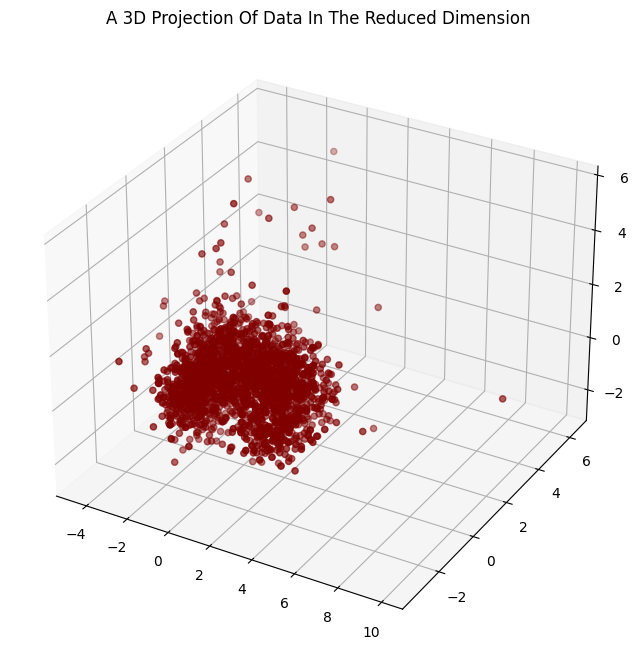

In [25]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)



Elbow Method to determine the number of clusters to be formed:


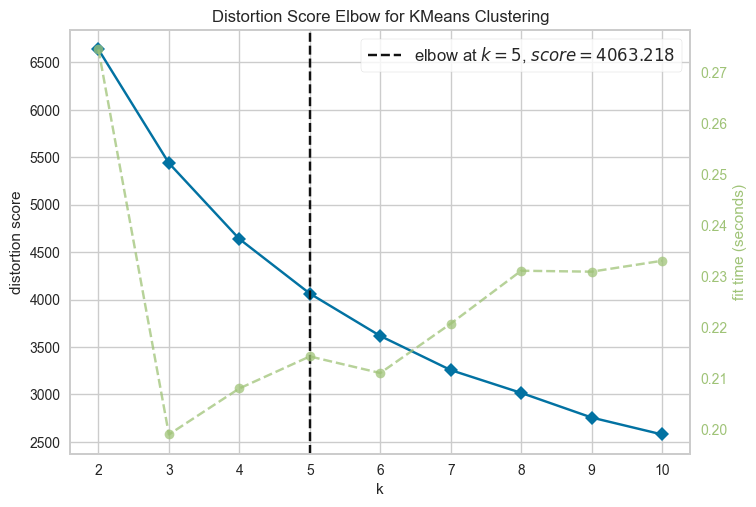

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [27]:
from sklearn.cluster import AgglomerativeClustering

AC = AgglomerativeClustering(n_clusters=5)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
df["Clusters"]= yhat_AC

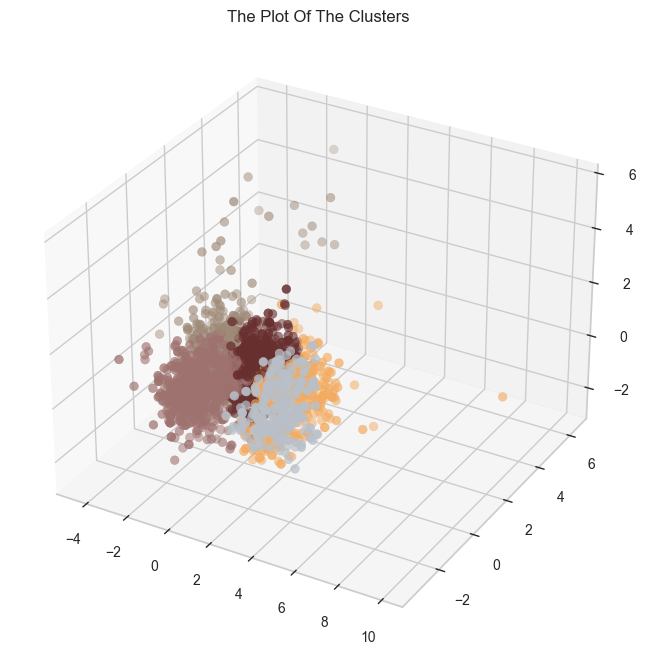

In [28]:
from matplotlib import colors

fig = plt.figure(figsize=(10,8))
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

Firstly, let us have a look at the group distribution of clustring

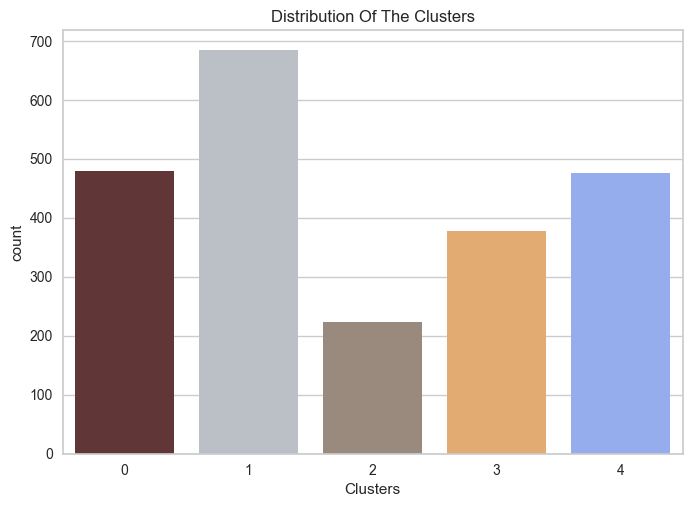

In [32]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#86A7FC"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.

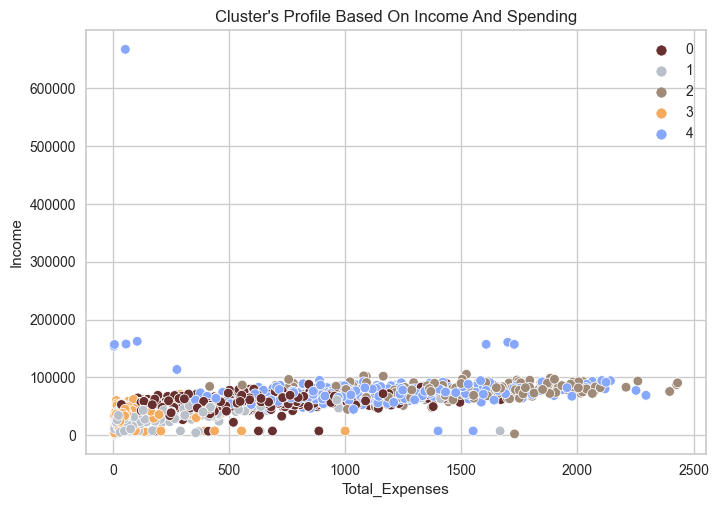

In [33]:
pl = sns.scatterplot(data = df,x=df["Total_Expenses"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

group 0: high spending & average income
group 1: high spending & high income
group 2: low spending & low income
group 3: high spending & low income

Detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

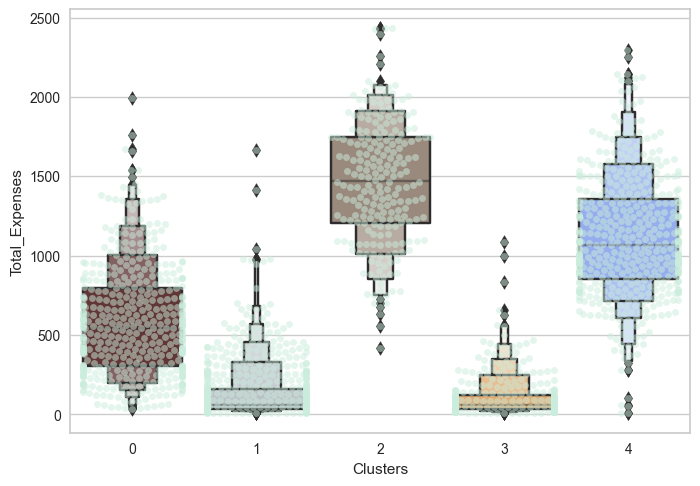

In [34]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Total_Expenses"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Total_Expenses"], palette=pal)
plt.show()

From the above plot, it can be clearly seen that cluster 4 is our biggest set of customers closely followed by cluster 2 and 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our campaigns do in the past.

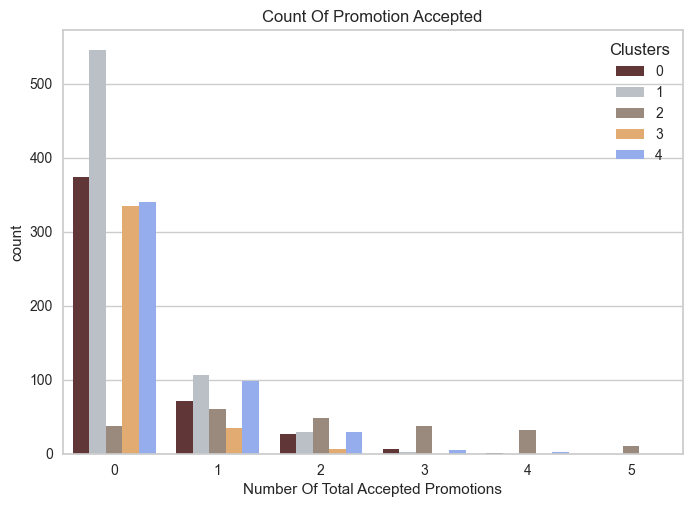

In [35]:
plt.figure()
pl = sns.countplot(x=df["TotalAcceptedCmp"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

### Visualization and Interpretation of results

After forming the clusters and looking at customer purchasing habits, lets see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about what category of specific customer the marketing team should be targeting to optimize sales.

To idenitfy this, we will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in.

<Figure size 800x550 with 0 Axes>

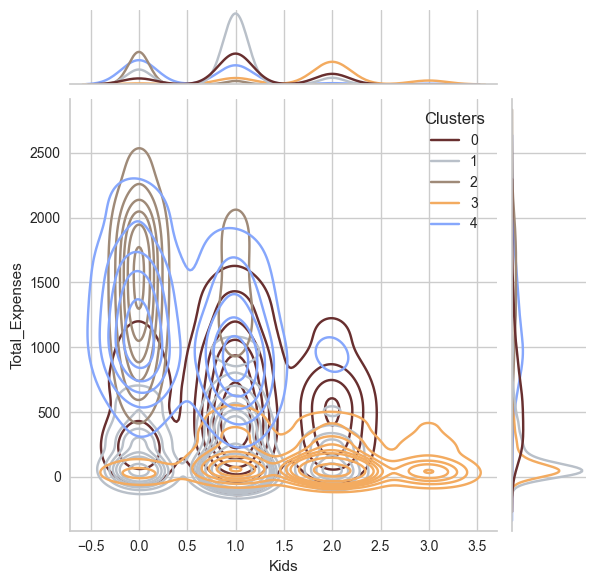

<Figure size 800x550 with 0 Axes>

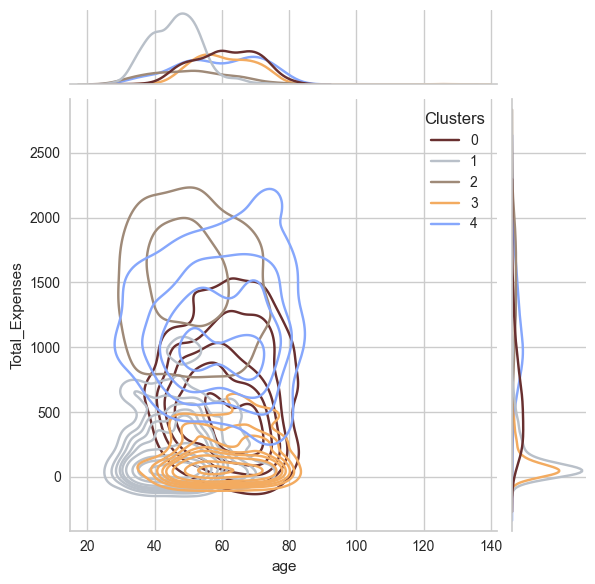

<Figure size 800x550 with 0 Axes>

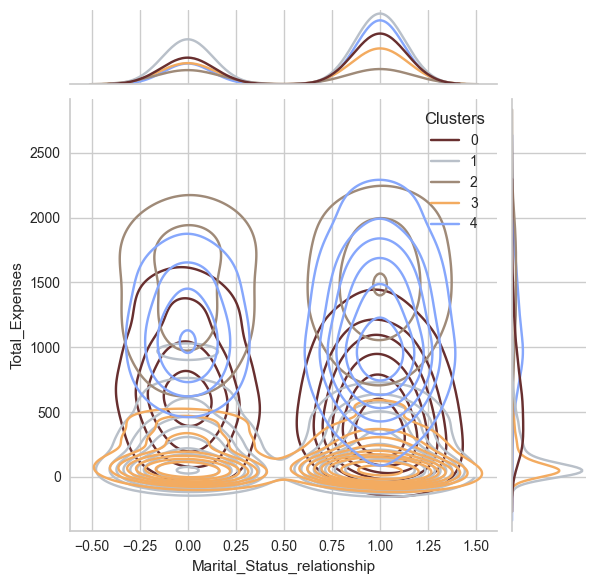

<Figure size 800x550 with 0 Axes>

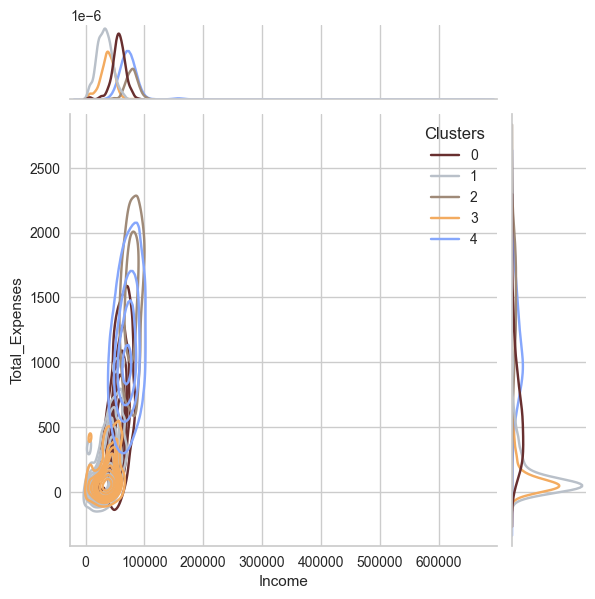

In [36]:
Personal = [ "Kids", "age", "Marital_Status_relationship", "Income"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Total_Expenses"], hue =df["Clusters"], kind="kde", palette=pal)
    plt.show()

The following information can be deduced about the customers in different clusters.

Cluster 0 : 
=> No kids or 1 kid in family.
=> Older in age
=> Mostly married
=> Lower income

Cluster 1 : 
=> 1 kid in family.
=> Yonger in age
=> Mix of single and married
=> Lower income

Cluster 2 : 
=> No kids.
=> Moderate in age
=> Mix of single and married
=> Higer income

Cluster 3 : 
=> 2 or more kids in family.
=> Moderate to Older in age
=> Mix of single and married
=> Lower income

Cluster 4 : 
=> No kids or 1 kid in family.
=> Older in age
=> Mostly married
=> Higer income

-----

## Happy Learning

-----

